In [ ]:
version


               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

# Introduction
## About ROC Curves

The Receiver Operating Characteristic (ROC) curve is used to assess the accuracy of a continuous measurement for predicting a binary outcome. In medicine, ROC curves have a long history of use for evaluating diagnostic tests in radiology and general diagnostics. ROC curves have also been used for a long time in signal detection theory.

The accuracy of a diagnostic test can be evaluated by considering the two possible types of errors: false positives, and false negatives. For a continuous measurement that we denote as M, convention dictates that a test positive is defined as M exceeding some fixed threshold c: M>c. In reference to the binary outcome that we denote as D, a good outcome of the test is when the test is positive among an individual who truly has a disease: D=1. A bad outcome is when the test is positive among an individual who does not have the disease D=0.

Formally, for a fixed cutoff c, the true positive fraction is the probability of a test positive among the diseased population:

TPF(c)=P{M>c|D=1}

and the false positive fraction is the probability of a test positive among the healthy population:

FPF(c)=P{M>c|D=0}

Since the cutoff c is not usually fixed in advance, we can plot the TPF against the FPF for all possible values of c. This is exactly what the ROC curve is, FPF(c) on the x axis and TPF(c) along the y axis.

Shiny application: https://sachsmc.shinyapps.io/plotROC/




In [1]:
devtools::install_github("hadley/ggplot2")
devtools::install_github("sachsmc/plotROC")
library(plotROC)

rlang      (0.4.8 -> 0.4.9) [CRAN]
vctrs      (0.3.4 -> 0.3.5) [CRAN]
cli        (2.1.0 -> 2.2.0) [CRAN]
pillar     (1.4.6 -> 1.4.7) [CRAN]
rstudioapi (0.12  -> 0.13 ) [CRAN]
rprojroot  (1.3-2 -> 2.0.2) [CRAN]
processx   (3.4.4 -> 3.4.5) [CRAN]
magrittr   (1.5   -> 2.0.1) [CRAN]
isoband    (0.2.2 -> 0.2.3) [CRAN]


Installing 9 packages: rlang, vctrs, cli, pillar, rstudioapi, rprojroot, processx, magrittr, isoband

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpuQBn5f/remotes39257bc13/tidyverse-ggplot2-b5cc4d6/DESCRIPTION’
─  preparing ‘ggplot2’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (373ms)
─  checking for empty or unneeded directories
─  building ‘ggplot2_3.3.2.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




fastmap     (NA -> 1.0.1   ) [CRAN]
sourcetools (NA -> 0.1.7   ) [CRAN]
xtable      (NA -> 1.8-4   ) [CRAN]
httpuv      (NA -> 1.5.4   ) [CRAN]
XML         (NA -> 3.99-0.5) [CRAN]
plyr        (NA -> 1.8.6   ) [CRAN]
shiny       (NA -> 1.5.0   ) [CRAN]
gridSVG     (NA -> 1.7-2   ) [CRAN]


Installing 8 packages: fastmap, sourcetools, xtable, httpuv, XML, plyr, shiny, gridSVG

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpuQBn5f/remotes396b7d1d16/sachsmc-plotROC-322868a/DESCRIPTION’
─  preparing ‘plotROC’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘plotROC_2.3.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2



Example data set with 2 markers, one that is moderately predictive and one that is not as predictive.

In [2]:
set.seed(2529)
D.ex <- rbinom(200, size = 1, prob = .5)
M1 <- rnorm(200, mean = D.ex, sd = .65)
M2 <- rnorm(200, mean = D.ex, sd = 1.5)

test <- data.frame(D = D.ex, D.str = c("Healthy", "Ill")[D.ex + 1], 
                   M1 = M1, M2 = M2, stringsAsFactors = FALSE)

## The Roc Geom

Next I use the ggplot function to define the aesthetics, and the geom_roc function to add an ROC curve layer. The geom_roc function requires the aesthetics d for disease status, and m for marker. The disease status need not be coded as 0/1, but if it is not, stat_roc assumes (with a warning) that the lowest value in sort order signifies disease-free status. stat_roc and geom_roc are linked by default, with the stat doing the underlying computation of the empirical ROC curve, and the geom consisting of the ROC curve layer.

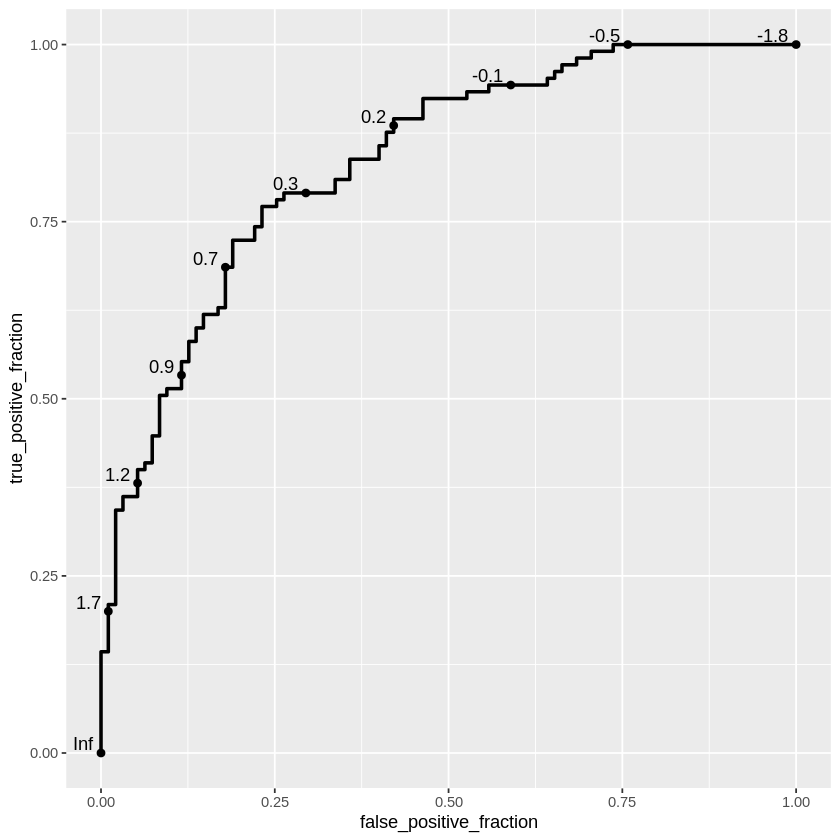

In [3]:
basicplot <- ggplot(test, aes(d = D, m = M1)) + geom_roc()
basicplot

The disease status aesthetic can be specified as a string or factor, but with a warning.

Warning message in verify_d(data$d):
“D not labeled 0/1, assuming Healthy = 0 and Ill = 1!”


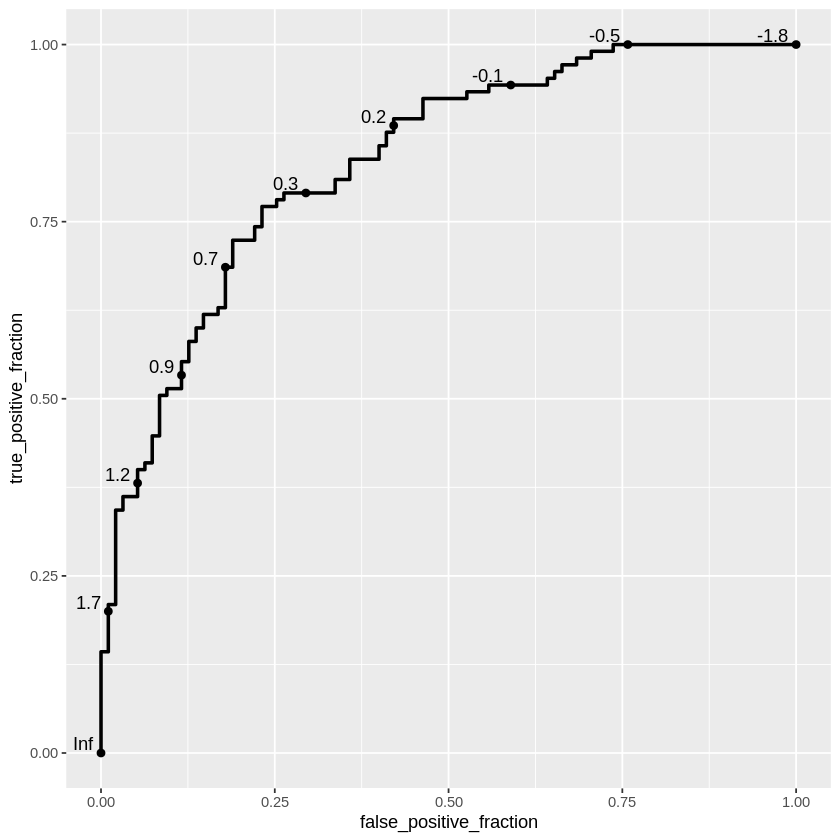

In [4]:
ggplot(test, aes(d = D.str, m = M1)) + geom_roc()

The geom_roc layer includes the ROC curve line combined with points and labels to display the values of the biomarker at the different cutpoints. It accepts the argument n.cuts to define the number of cutpoints to display along the curve. Labels can be supressed by using n.cuts = 0 or labels = FALSE. The size of the labels and the number of significant digits can be adjusted with labelsize and labelround, respectively.

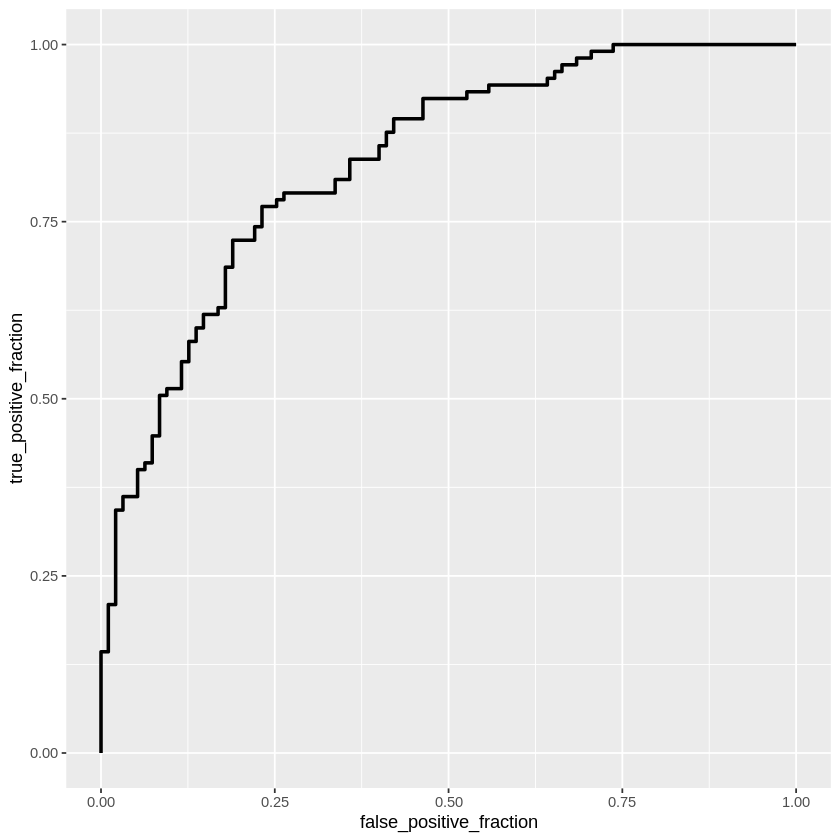

In [5]:
ggplot(test, aes(d = D, m = M1)) + geom_roc(n.cuts = 0)

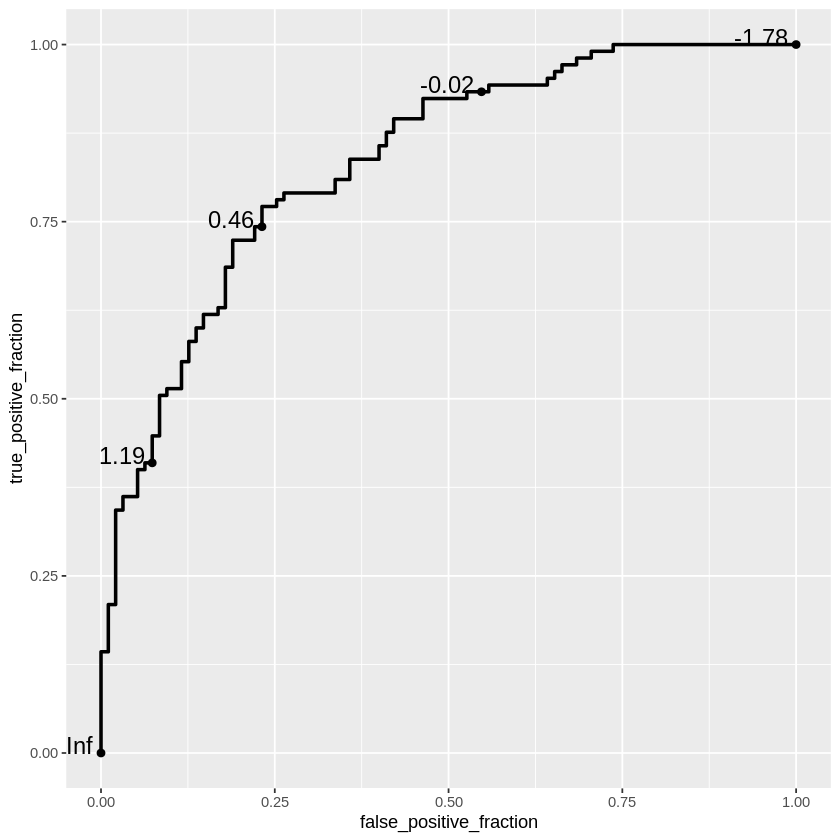

In [6]:
ggplot(test, aes(d = D, m = M1)) + geom_roc(n.cuts = 5, labelsize = 5, labelround = 2)

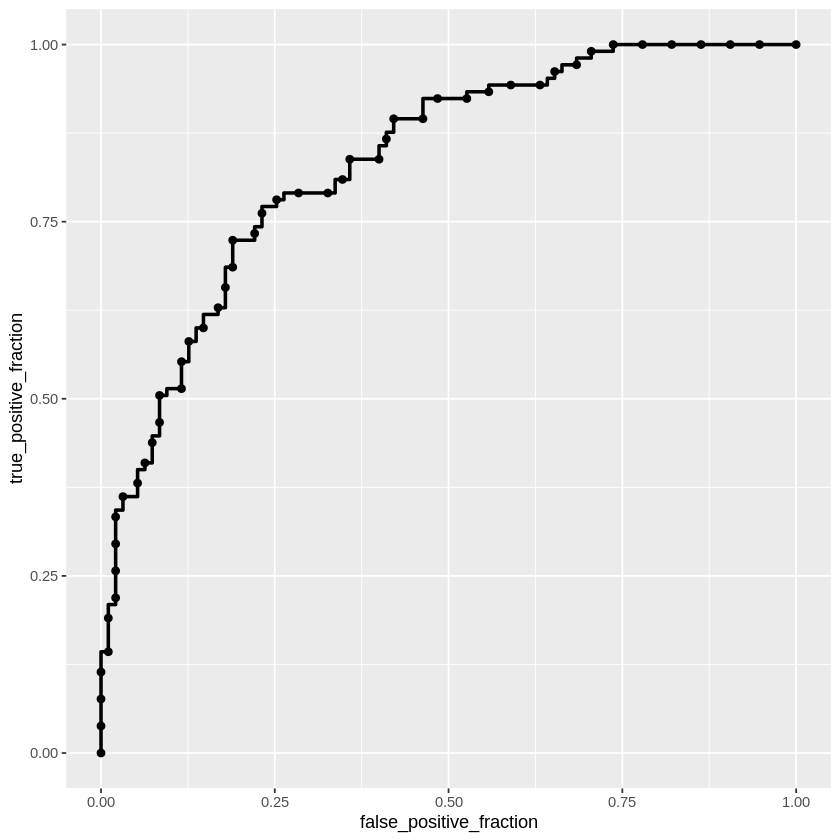

In [7]:
ggplot(test, aes(d = D, m = M1)) + geom_roc(n.cuts = 50, labels = FALSE)

We provide a function style_roc that can be added to a ggplot that contains an ROC curve layer. This adds a diagonal guideline, sets the axis labels, and adjusts the major and minor grid lines. The direct_label function operates on a ggplot object, adding a direct label to the plot. It attempts to intellegently select an appropriate location for the label, but the location can be adjusted with nudge_x, nudge_y and label.angle. If the labels argument is NULL, it will take the name from the mapped aesthetic.

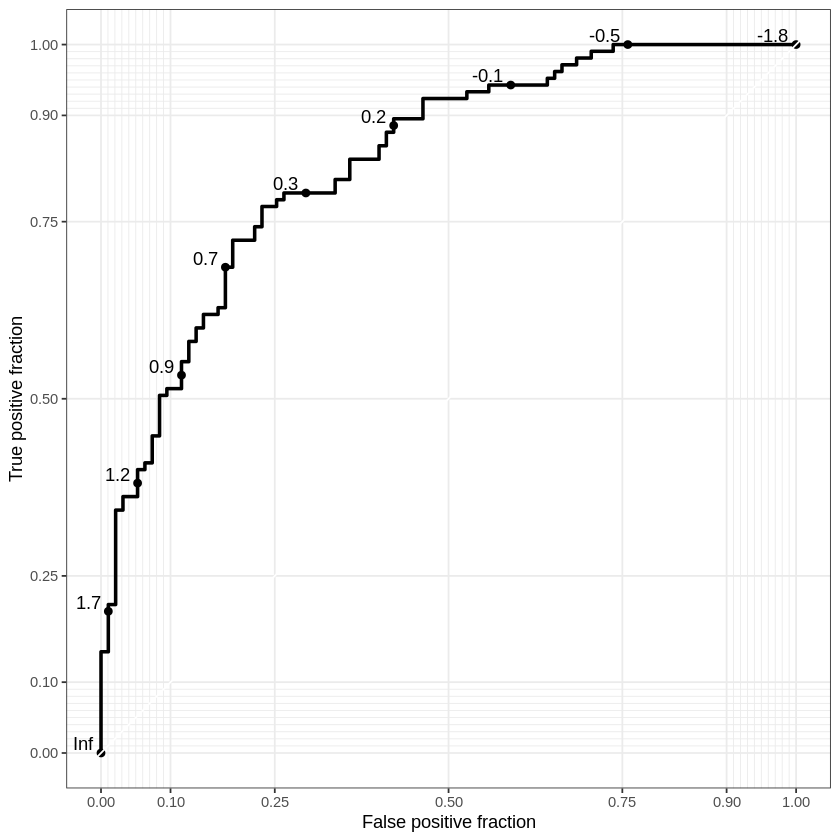

In [8]:
styledplot <- basicplot + style_roc()
styledplot

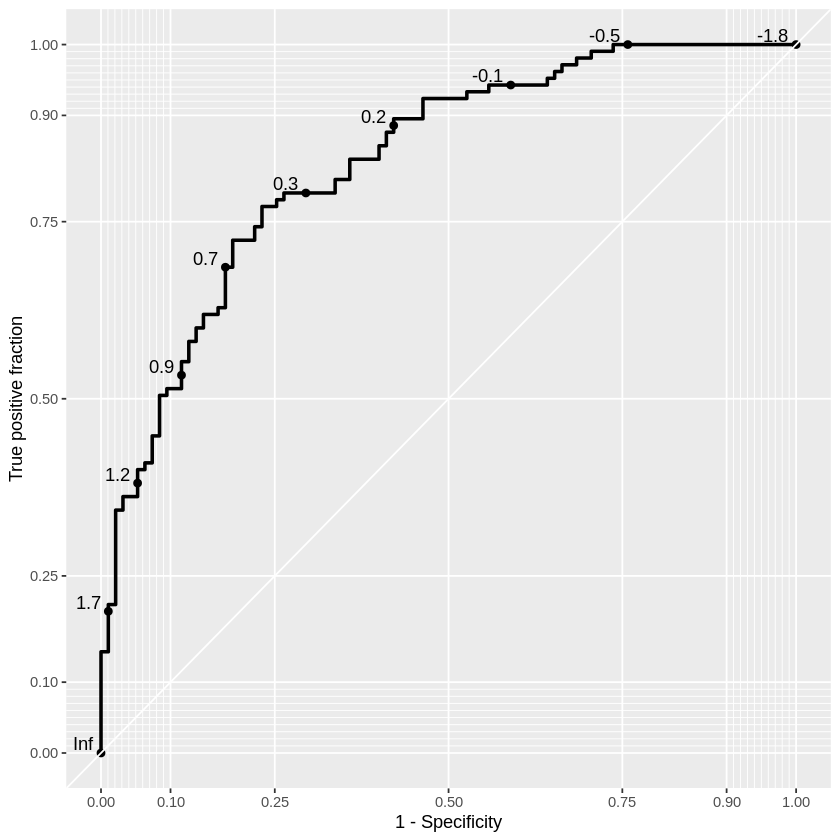

In [9]:
basicplot + style_roc(theme = theme_grey, xlab = "1 - Specificity")

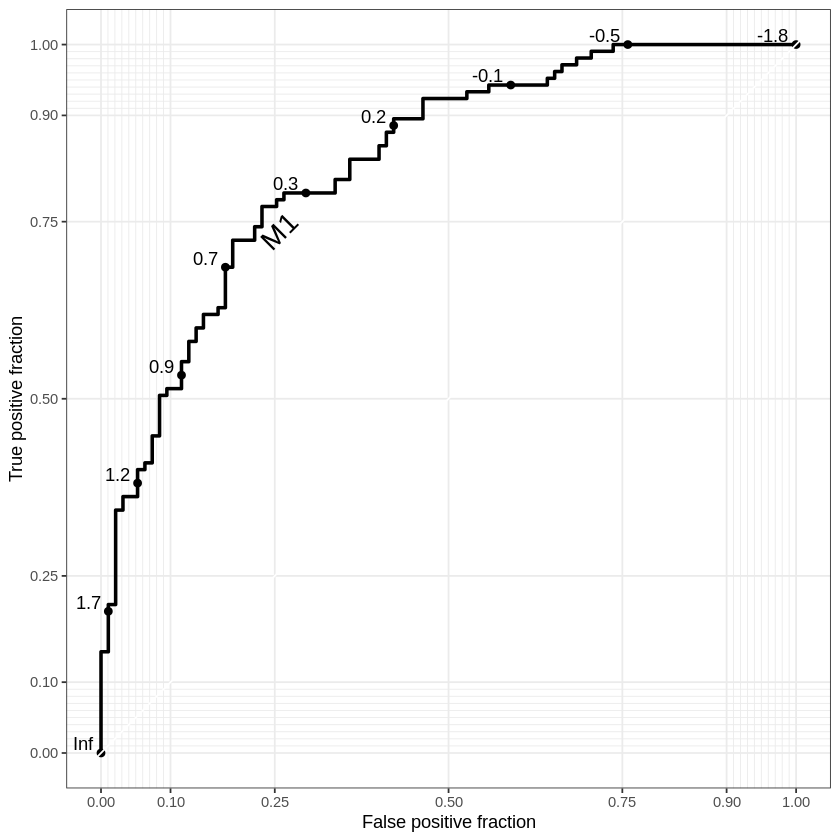

In [10]:
direct_label(basicplot) + style_roc()

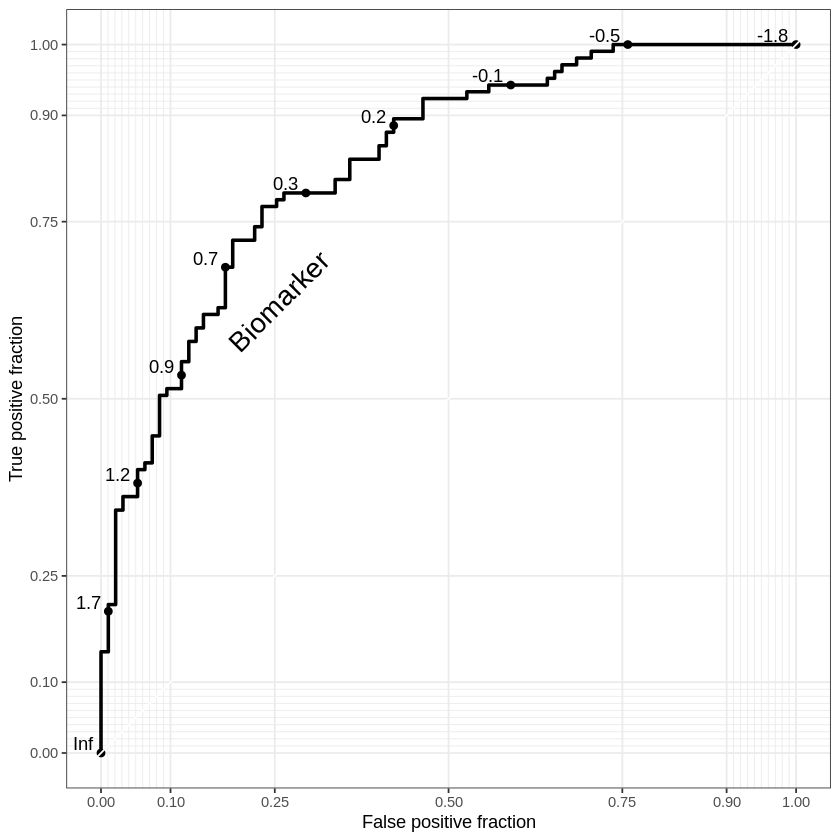

In [11]:
direct_label(basicplot, labels = "Biomarker", nudge_y = -.1) + style_roc()

## Confidence regions and the Rocci Geom
It is common to compute confidence regions for points on the ROC curve using the Clopper and Pearson (1934) exact method. Briefly, exact confidence intervals are calculated for the FPF and TPF separately, each at level 1−1−α−−−−−√. Based on result 2.4 from Pepe (2003), the cross-product of these intervals yields a 100∗(1−α) percent rectangular confidence region for the pair.

This is implemented in the stat_rocci and displayed as a geom_rocci layer. These both require the same aesthetics as the ROC geom, d for disease status and m for marker. By default, a set of 3 evenly spaced points along the curve are chosed to display confidence regions. You can select points by passing a vector of values in the range of m to the ci.at argument. By default, the significance level α is set to 0.05, this can be changed using the sig.level option.

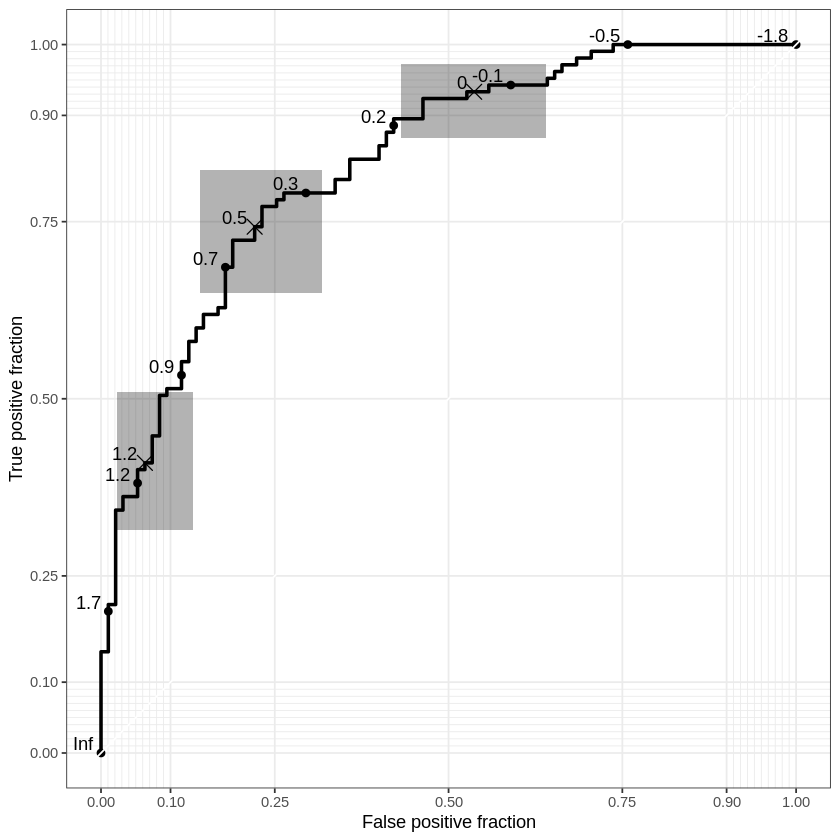

In [12]:
styledplot + geom_rocci()

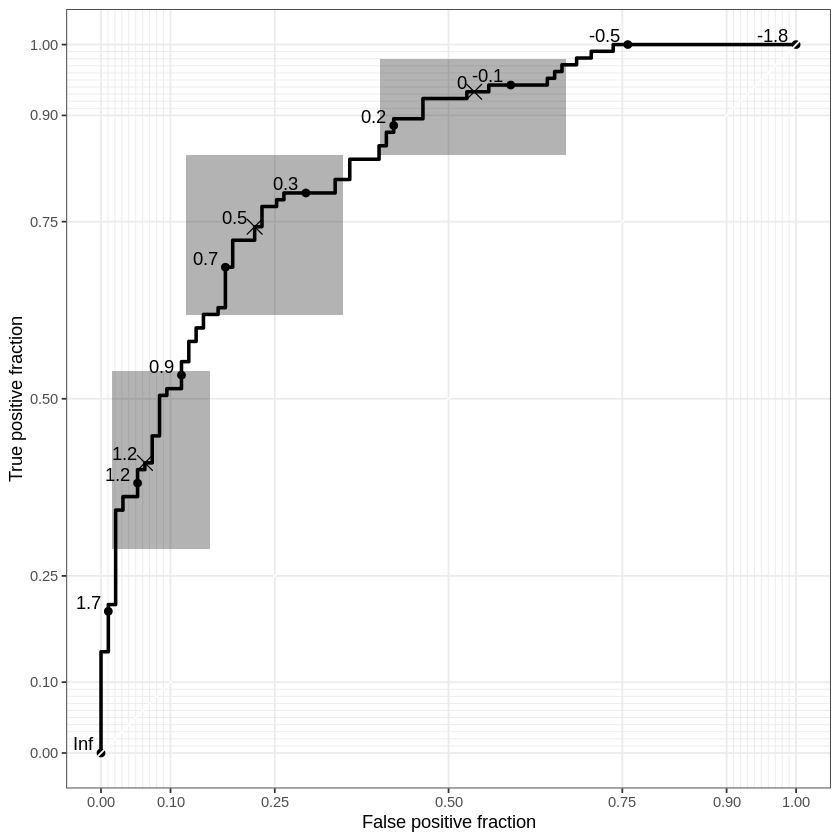

In [13]:
styledplot + geom_rocci(sig.level = .01)

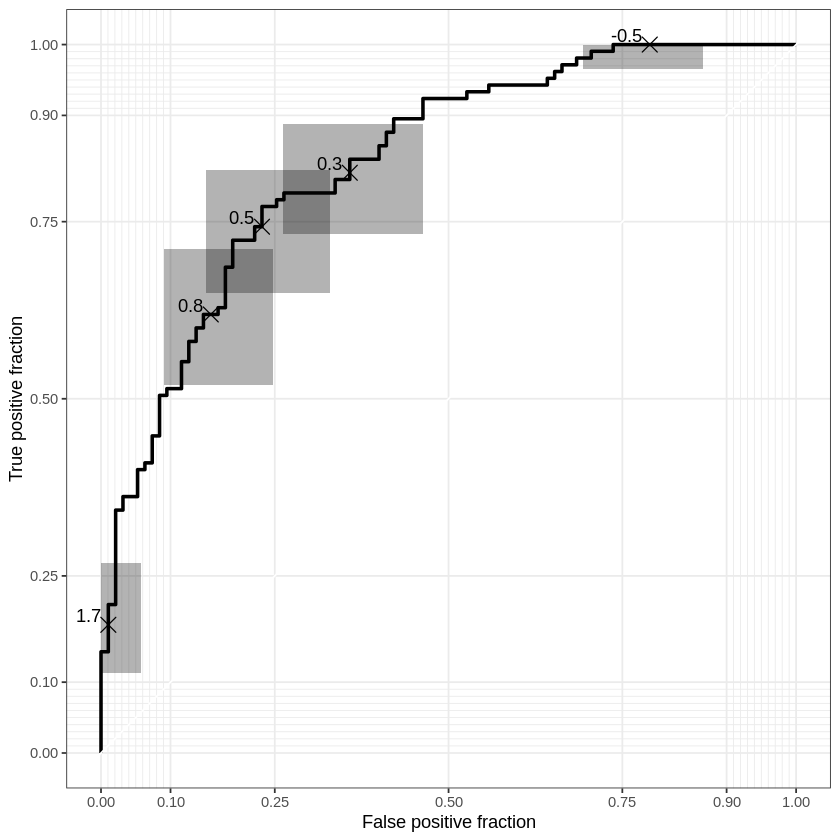

In [14]:
ggplot(test, aes(d = D, m = M1)) + geom_roc(n.cuts = 0) +
  geom_rocci(ci.at = quantile(M1, c(.1, .4, .5, .6, .9))) + style_roc()


## Interactive Plots
Ggplot objects that contain a GeomRoc layer can be used to create an interactive plot and display it in the Rstudio viewer or default web browser by passing it to the plot_interactive_roc, or export_interactive_roc function. The style_roc function is applied by default. Give the function an optional path to an html file as an argument called file to save the interactive plot as a complete web page. By default, any existing Rocci layers are removed and replaced with a dense layer of confidence regions so that the user can click anywhere for a confidence region. This can be suppressed by add.cis = FALSE. Furthermore, the points layer of the Roc geom can be hidden by using the hide.points option.

Hovering over the display shows the cutoff value at the point nearest to the cursor. Clicking makes the cutoff label stick until the next click, and if confidence regions are available, clicks will also display those as grey rectangles. The confidence regions are automatically detected. When the user clicks on the ROC curve, the confidence region for the TPF and FPF is overlaid using a grey rectangle. The label and region stick until the next click.

In [15]:
plot_interactive_roc(basicplot)

An interactive ROC plot can be exported by using the export_interactive_roc function, which returns a character string containing the necessary HTML and JavaScript. The character string can be copy-pasted into an html document, or better yet, incorporated directly into a dynamic document using knitr (knitr homepage).

In a knitr document, it is necessary to use the cat function on the results and use the chunk options results = 'asis' and fig.keep='none' so that the interactive plot is displayed correctly. For documents that contain multiple interactive plots, it is necessary to assign each plot a unique name using the prefix argument of export_interactive_roc. This is necessary to ensure that the JavaScript code manipulates the correct svg elements. The next code block shows an example knitr chunk that can be used in an .Rmd document to display an interactive plot.

In [ ]:
```{r int-no, fig.keep='none', results = 'asis'}
cat(
  export_interactive_roc(basicplot, 
                        prefix = "a")
  )
```

In [ ]:
cat(
  export_interactive_roc(basicplot, 
                        prefix = "a")
  )

## Multiple ROC curves
If you have grouping factors in your dataset, or you have multiple markers measured on the same subjects, you may wish to plot multiple ROC curves on the same plot. plotROC fully supports faceting and grouping done by ggplot2. In out example dataset, we have 2 markers measured in a paired manner:

In [18]:
head(test)

,D,D.str,M1,M2
,<int>,<chr>,<dbl>,<dbl>
1,1,Ill,1.48117155,-2.50636605
2,1,Ill,0.61994478,1.46861033
3,0,Healthy,0.57613345,0.07532573
4,1,Ill,0.85433197,2.41997703
5,0,Healthy,0.05258342,0.01863718
6,1,Ill,0.66703989,0.24732453


These data are in wide format, with the 2 markers going across 2 columns. ggplot requires long format, with the marker result in a single column, and a third variable identifying the marker. We provide the function melt_roc to perform this transformation. The arguments are the data frame, a name or index identifying the disease status column, and a vector of names or indices identifying the the markers. Optionally, the names argument gives a vector of names to assign to the marker, replacing their column names. The result is a data frame in long format.

In [19]:
longtest <- melt_roc(test, "D", c("M1", "M2"))
head(longtest)

,D,M,name
,<int>,<dbl>,<chr>
M11,1,1.48117155,M1
M12,1,0.61994478,M1
M13,0,0.57613345,M1
M14,1,0.85433197,M1
M15,0,0.05258342,M1
M16,1,0.66703989,M1


Then, the dataset can be passed to the ggplot function, with the marker name given as a grouping or faceting variable.

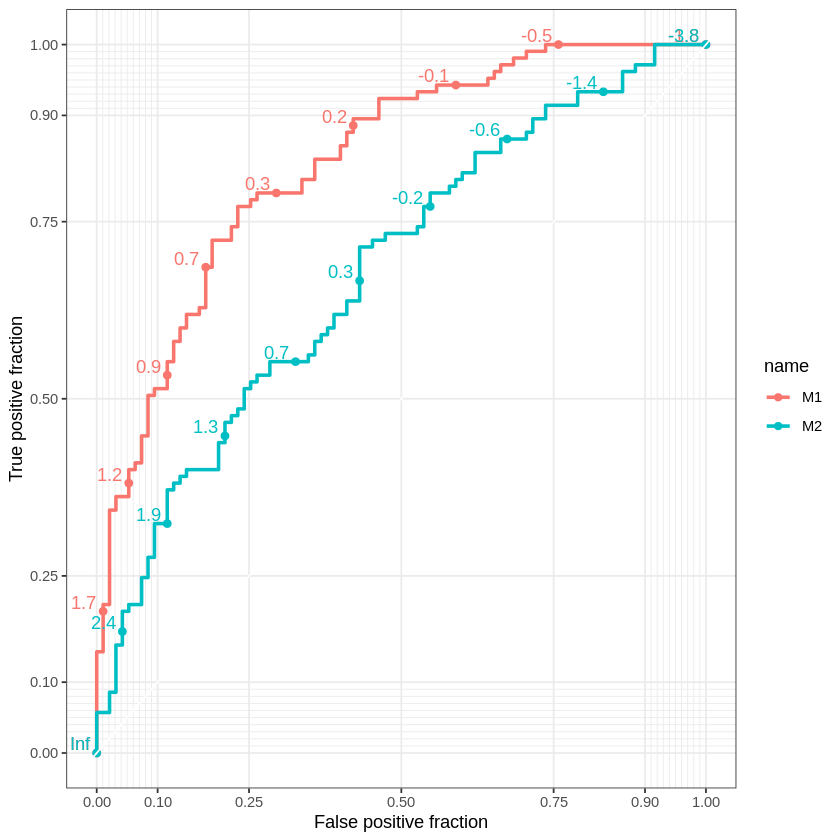

In [20]:
ggplot(longtest, aes(d = D, m = M, color = name)) + geom_roc() + style_roc()

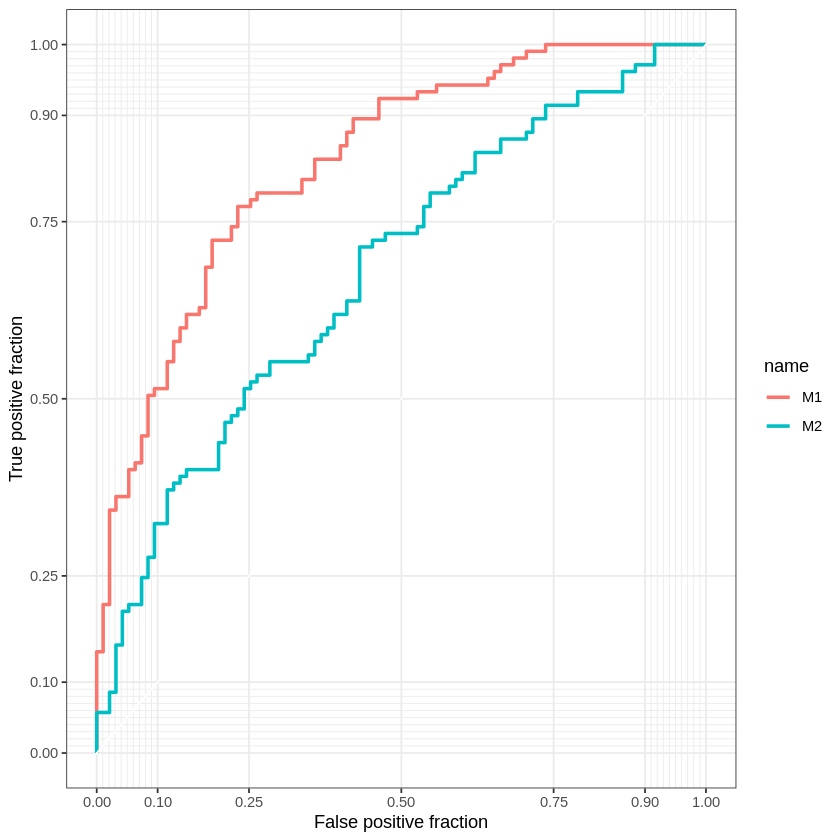

In [21]:
ggplot(longtest, aes(d = D, m = M, color = name)) + geom_roc(n.cuts = 0) + style_roc()

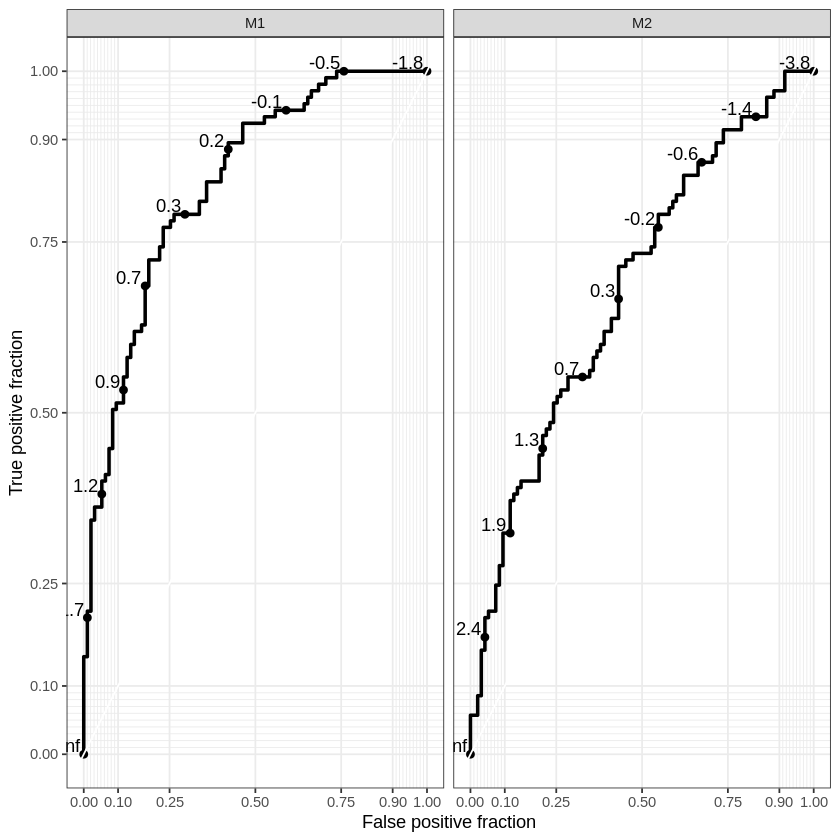

In [22]:
ggplot(longtest, aes(d = D, m = M)) + geom_roc() + facet_wrap(~ name) + style_roc()

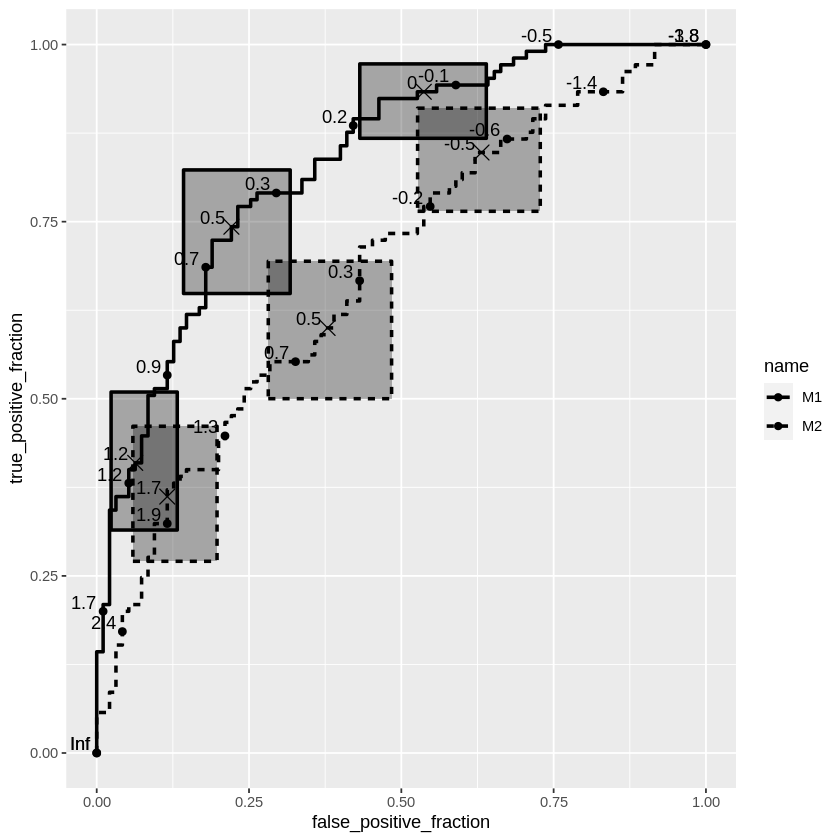

In [23]:
ggplot(longtest, aes(d = D, m = M, linetype = name)) + geom_roc() + geom_rocci()

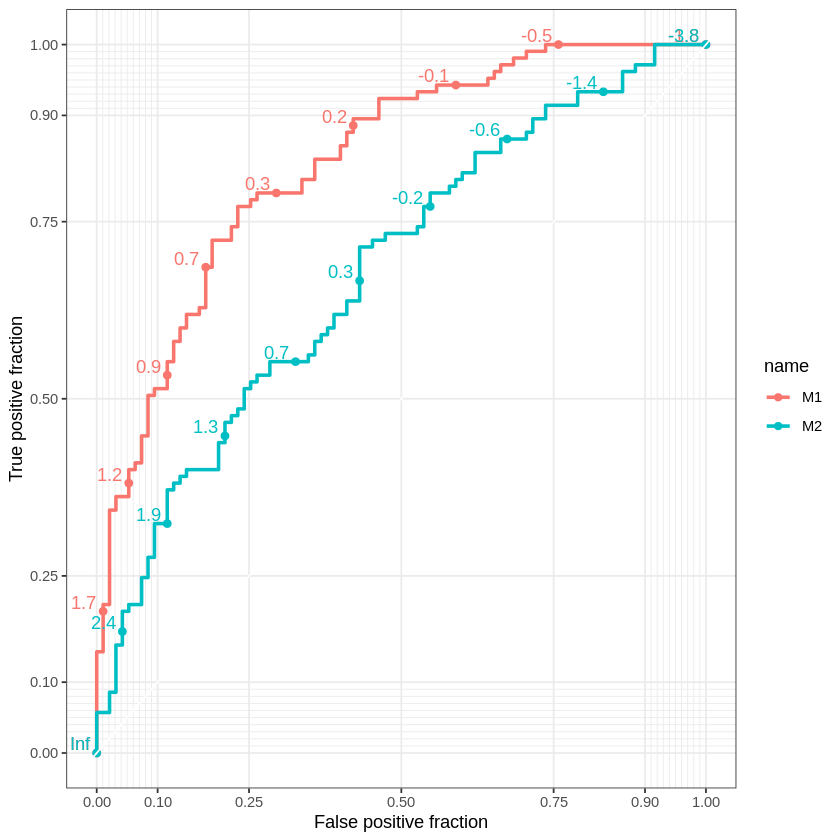

In [24]:
ggplot(longtest, aes(d = D, m = M, color = name)) + geom_roc() + style_roc()

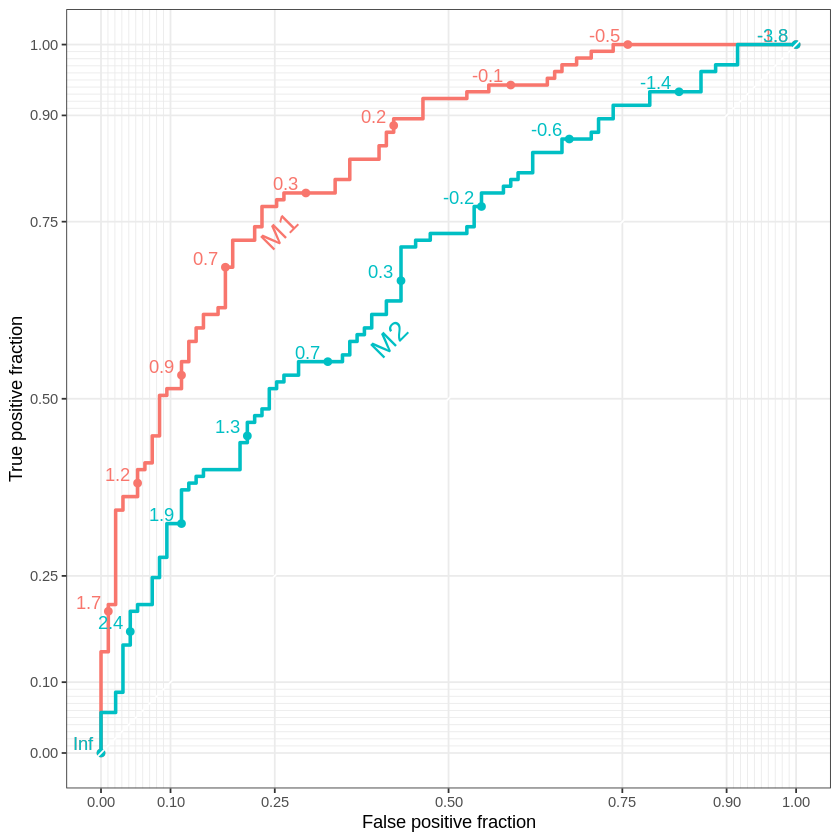

In [25]:
pairplot <- ggplot(longtest, aes(d = D, m = M, color = name)) + 
  geom_roc(show.legend = FALSE) + style_roc()
direct_label(pairplot)

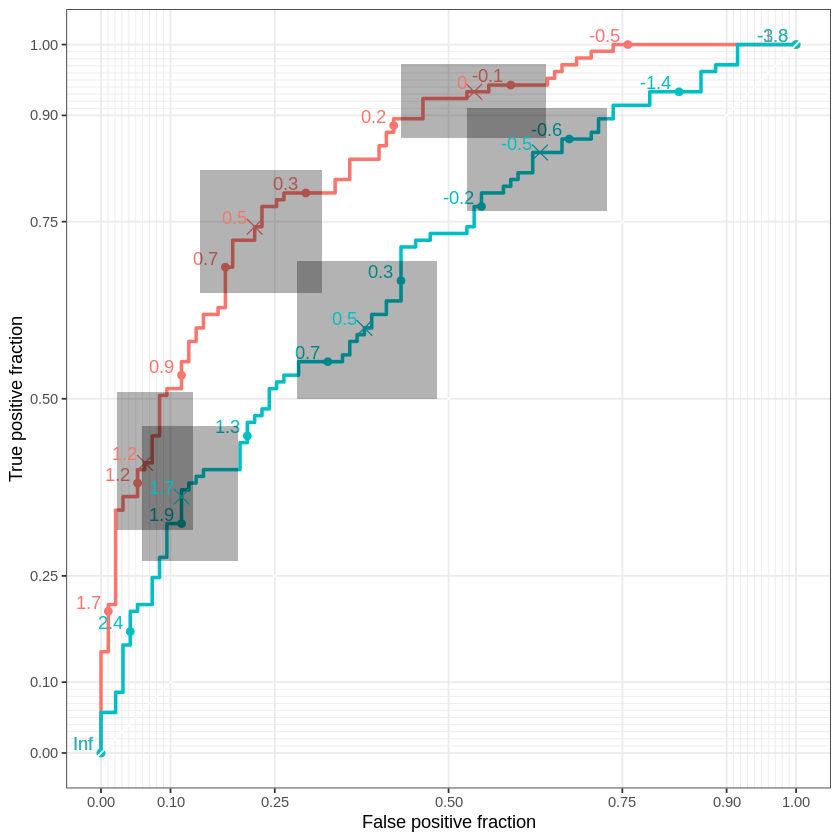

In [26]:
pairplot + geom_rocci()

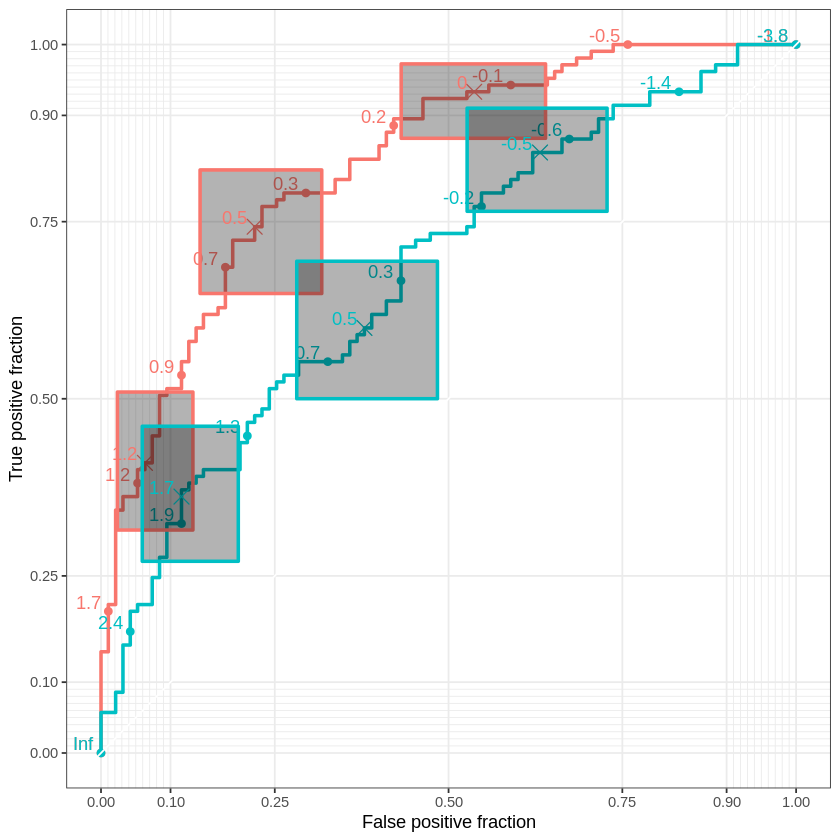

In [27]:
pairplot + geom_rocci(linetype = 1)

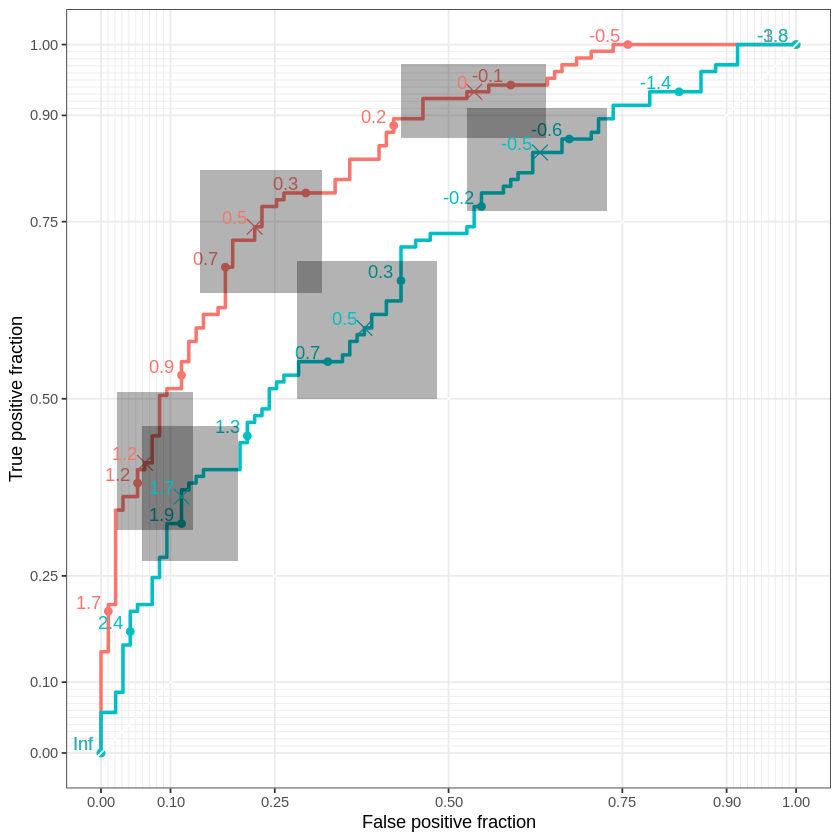

In [28]:
pairplot + geom_rocci()

# ROC curves using pROC package

In [37]:
# data set
url<-"https://stats.idre.ucla.edu/stat/data/binary.csv"
download.file(url, "binary.csv")

In [38]:
raw<-read.csv("binary.csv")
summary(raw)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [42]:
set.seed(123)
partition <- sample(2, nrow(raw), replace=TRUE, prob=c(0.7, 0.3))
tdata <- raw[partition==1,]
vdata <- raw[partition==2,]
dim(tdata)

[1] 285   4

In [44]:
vdata_X <- vdata[,-1]
vdata_Y <- vdata[,-(2:4)]

In [47]:
# Logistic Regression 
LR_fit <- glm(admit~.,data=tdata,family = binomial())
summary(LR_fit)


Call:
glm(formula = admit ~ ., family = binomial(), data = tdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6226  -0.9052  -0.6161   1.1109   2.1483  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.727209   1.411025  -3.350 0.000808 ***
gre          0.001796   0.001280   1.403 0.160601    
gpa          1.249248   0.395265   3.161 0.001575 ** 
rank        -0.522473   0.150021  -3.483 0.000496 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 365.52  on 284  degrees of freedom
Residual deviance: 329.29  on 281  degrees of freedom
AIC: 337.29

Number of Fisher Scoring iterations: 3


In [48]:
LR_predict <- predict(LR_fit,newdata = vdata_X,type="response")

In [49]:
LR_predict_bin <- ifelse(LR_predict > 0.6,1,0)

In [50]:
#Confusion matrix
cm_lr <- table(vdata_Y,LR_predict_bin)
#Accuracy
accuracy <- (sum(diag(cm_lr))/sum(cm_lr)) 
accuracy

[1] 0.7565217

In [56]:
install.packages("e1071")
library(e1071)
svm_fit = svm(admit ~ .,data = tdata, kernel = "linear",cost=1,scale = FALSE)
svm_predict <- predict(svm_fit,newdata = vdata_X,type="response")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
#Accuracy 
svm_accuracy <- (sum(diag(cm_lr))/sum(cm_lr))
svm_accuracy

[1] 0.7565217

In [51]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



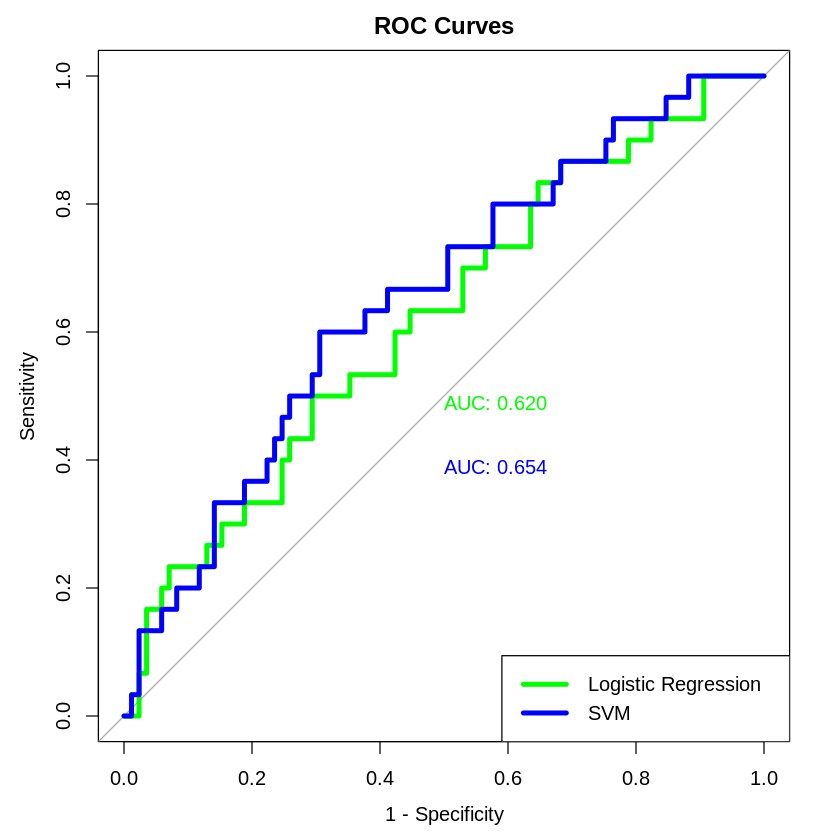

In [60]:
library(pROC)
par(pty="s")
lrROC <- roc(vdata_Y ~ LR_predict,plot=TRUE,print.auc=TRUE,col="green",lwd =4,legacy.axes=TRUE,main="ROC Curves")
## Setting levels: control = 0, case = 1
## Setting direction: controls < cases
svmROC <- roc(vdata_Y ~ svm_predict,plot=TRUE,print.auc=TRUE,col="blue",lwd = 4,print.auc.y=0.4,legacy.axes=TRUE,add = TRUE)
## Setting levels: control = 0, case = 1 ## Setting direction: controls < cases
legend("bottomright",legend=c("Logistic Regression","SVM"),col=c("green","blue"),lwd=4)